In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [62]:
df = pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,VIRUS
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [63]:
df.shape

(400, 3)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Med_1_mL  400 non-null    float64
 1   Med_2_mL  400 non-null    float64
 2   VIRUS     400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [65]:
df['VIRUS'] = df['VIRUS '].replace(' ', '')

In [66]:
df['VIRUS']

0      0
1      1
2      0
3      1
4      1
      ..
395    1
396    0
397    0
398    1
399    0
Name: VIRUS, Length: 400, dtype: int64

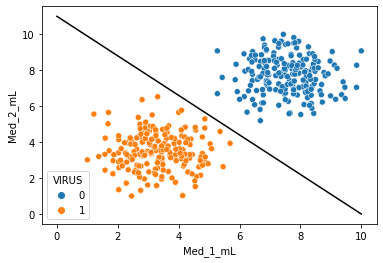

In [67]:
sns.scatterplot(x = 'Med_1_mL', y = 'Med_2_mL', hue = 'VIRUS', data = df)

# Create Hyperplane
x = np.linspace(0, 10, 100)
m = -1.1
b = 11
y = m*x+b

plt.plot(x, y, 'black')

In [68]:
from sklearn.svm import SVC

In [69]:
# help(SVC)

In [70]:
X = df.drop('VIRUS', axis = 1)

In [71]:
y = df['VIRUS']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, shuffle = False)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()

In [76]:
X_train = scaler.fit_transform(X_train)

In [77]:
X_test = scaler.transform(X_test)

In [78]:
model = SVC(kernel = 'linear', C = 1000)

In [79]:
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [80]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

     # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
svm = SVC()
param_grid = {'C' : [0.01, 0.1, 1], 'kernel' : ['linear', 'rbf']}

In [87]:
grid = GridSearchCV(svm, param_grid)

In [88]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [89]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [90]:
# from svm_margin_plot import plot_svm_boundary

In [91]:
# C = 1.0 
# lin_svc = SVC(kernel='linear', C=C).fit(X, y)
# rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# poly_svc = SVC(kernel='poly', degree=3, C=C).fit(X, y)
# sigmoid = SVC(kernel='sigmoid',C=C).fit(X, y)

ValueError: X has 2 features, but SVC is expecting 3 features as input.

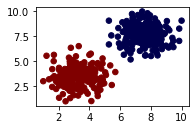

In [92]:
plt.subplot(2,2,1)
plot_svm_boundary(lin_svc,X,y)
plt.subplot(2,2,2)
plot_svm_boundary(rbf_svc,X,y)
plt.subplot(2,2,3)
plot_svm_boundary(poly_svc,X,y)
plt.subplot(2,2,4)
plot_svm_boundary(sigmoid,X,y)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
svm = SVC()
param_grid = {'C' : [0.01, 0.1, 1], 'kernel' : ['linear', 'rbf']}

In [ ]:
grid = GridSearchCV(svm, param_grid)

In [ ]:
grid.fit(X,y)

In [ ]:
grid.best_params_